In [1]:
!git clone https://github.com/sherstpasha/thefittest thefittest_clone
!cp -r /content/thefittest_clone/src/thefittest /content/thefittest

Cloning into 'thefittest_clone'...
remote: Enumerating objects: 4454, done.
remote: Counting objects: 100% (860/860), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 4454 (delta 549), reused 830 (delta 531), pack-reused 3594
Receiving objects: 100% (4454/4454), 19.61 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (2736/2736), done.


## Iris flower data set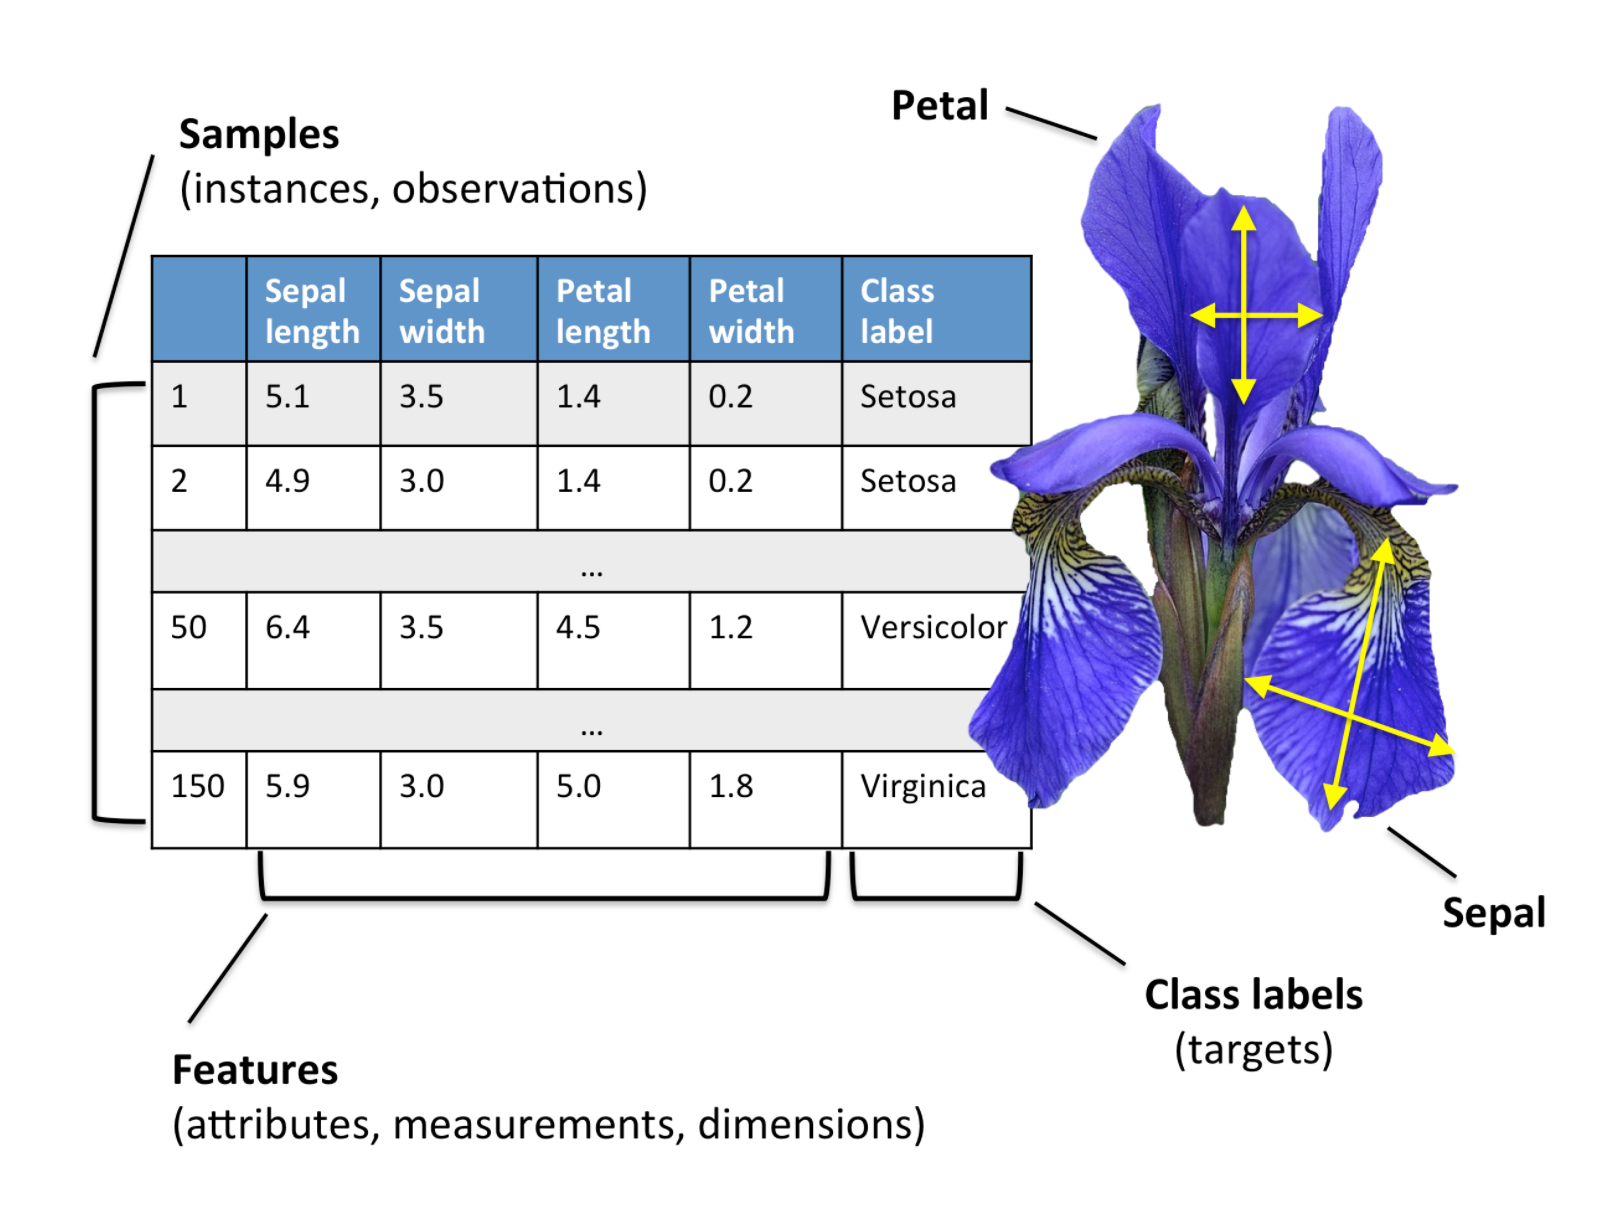

In [5]:
import numpy as np

from thefittest.optimizers import SelfCGP
from thefittest.optimizers import SHAGA
from thefittest.benchmarks import IrisDataset
from thefittest.classifiers import MLPEAClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


data = IrisDataset()
X = data.get_X()
y = data.get_y()

X_scaled = minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1)

model = MLPEAClassifier(n_iter=500,
                        pop_size=500,
                        hidden_layers = [5, 5],
                        weights_optimizer=SHAGA,
                        weights_optimizer_args={"show_progress_each": 10})

model.fit(X_train, y_train)
predict = model.predict(X_test)


print("confusion_matrix: \n", confusion_matrix(y_test, predict))
print("f1_score: \n", f1_score(y_test, predict, average="macro"))



0-th iteration with the best fitness = 0.7621084847483341
10-th iteration with the best fitness = 0.6388755211795755
20-th iteration with the best fitness = 0.4567063938991657
30-th iteration with the best fitness = 0.2902403390062181
40-th iteration with the best fitness = 0.25196989311941703
50-th iteration with the best fitness = 0.1556986373845029
60-th iteration with the best fitness = 0.1277744577760476
70-th iteration with the best fitness = 0.10575670512373964
80-th iteration with the best fitness = 0.08803329417682987
90-th iteration with the best fitness = 0.07379904249774391
100-th iteration with the best fitness = 0.061247169739190734
110-th iteration with the best fitness = 0.05698481736827891
120-th iteration with the best fitness = 0.05089977973857052
130-th iteration with the best fitness = 0.04723495347651218
140-th iteration with the best fitness = 0.04572112358525422
150-th iteration with the best fitness = 0.044946932081877604
160-th iteration with the best fitness 

In [ ]:
net = model.get_net()
net.plot()

## Regression problem

$$y = \frac{1}{2} x \sin(3 x)$$

In [8]:
import numpy as np


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5

In [11]:
import matplotlib.pyplot as plt

from thefittest.regressors import MLPEARegressor
from thefittest.optimizers import PDPGP

from sklearn.preprocessing import scale
from sklearn.metrics import r2_score


n_dimension = 1
left_border = -4.5
right_border = 4.5
sample_size = 100


X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
noise = np.random.normal(0, 0.1, size=sample_size)
y = problem(X) + noise

X_scaled = scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1)

model = MLPEARegressor(n_iter=500,
                       pop_size=500,
                       hidden_layers = [15, 15],
                       weights_optimizer=SHAGA,
                       weights_optimizer_args={"show_progress_each": 10})

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("r2_score:", r2_score(y_test, predict))

0-th iteration with the best fitness = 2.0851270280016263
10-th iteration with the best fitness = 1.2828392479989221
20-th iteration with the best fitness = 1.2166153958919272
30-th iteration with the best fitness = 0.9605116158719351
40-th iteration with the best fitness = 0.884807472744512
50-th iteration with the best fitness = 0.8823795134185395
60-th iteration with the best fitness = 0.8250587274942227
70-th iteration with the best fitness = 0.776450424168726
80-th iteration with the best fitness = 0.7055546445747861
90-th iteration with the best fitness = 0.6137273941967728
100-th iteration with the best fitness = 0.5558434306719783
110-th iteration with the best fitness = 0.5396808075106346
120-th iteration with the best fitness = 0.529869432758369
130-th iteration with the best fitness = 0.5015079722862253
140-th iteration with the best fitness = 0.4954849331027778
150-th iteration with the best fitness = 0.4806398191798982
160-th iteration with the best fitness = 0.46657257343

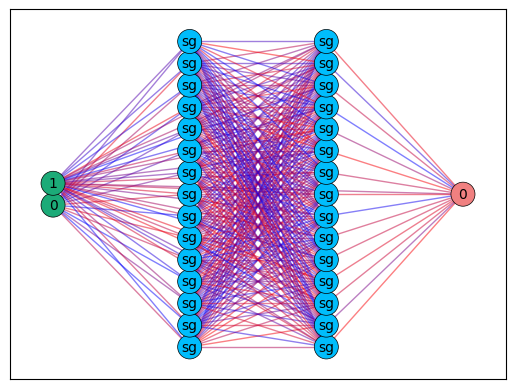

In [12]:
net = model.get_net()
net.plot()